
I have some cropped images and I need images that have black texts on white background.

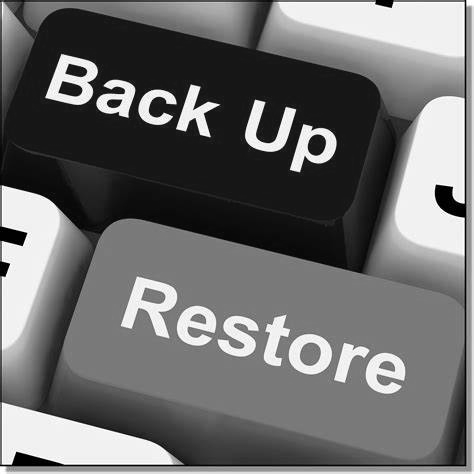

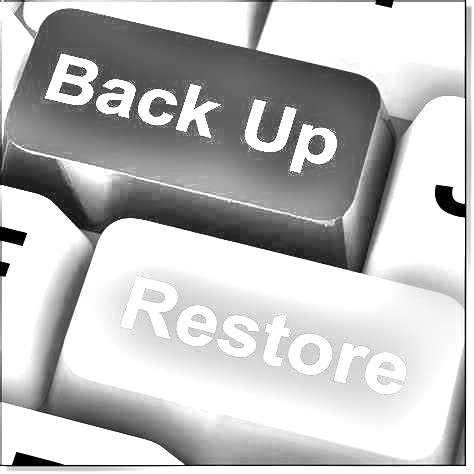

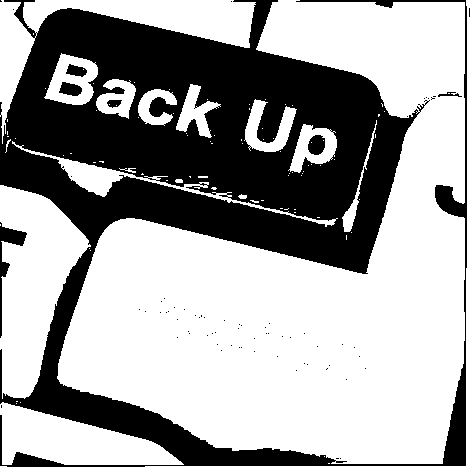

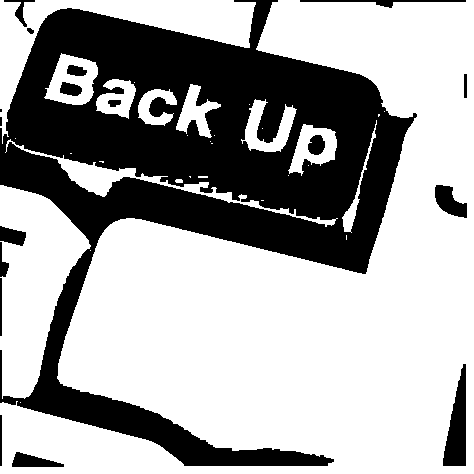

In [192]:
import cv2
import numpy as np

# load image
img = cv2.imread("/content/bu.jpeg")

# convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# blur
blur = cv2.GaussianBlur(gray, (0,0), sigmaX=33, sigmaY=33)

# divide
divide = cv2.divide(gray, blur, scale=255)

# otsu threshold
thresh = cv2.threshold(divide, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

# apply morphology
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# write result to disk
cv2.imwrite("hebrew_text_division.jpg", divide)
cv2.imwrite("hebrew_text_division_threshold.jpg", thresh)
cv2.imwrite("hebrew_text_division_morph.jpg", morph)

# display it
cv2_imshow( gray)
cv2_imshow( divide)
cv2_imshow( thresh)
cv2_imshow( morph)
cv2.waitKey(0)
cv2.destroyAllWindows()